In [59]:
import pandas as pd
import requests
import random
import json
from citipy import citipy
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
weather_base_url = "http://api.openweathermap.org/data/2.5/weather?"

In [ ]:
# Deleted api key information before pushing to github

## List of Cities

In [15]:
# DataFrame to hold the weather data

columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
cities_df = pd.DataFrame(columns = columns)

# Generate cities list
cities_list = []

# Convert to set to remove duplicate cities
# Additional cities are collected in case the weather api didn't recognize the name
while len(set(cities_list)) < 800:
    
# Coordinates are generated using random numbers within the bounds of latitude and longitude values
    lat = round(random.randint(-90, 89) + random.random(), 6)
    lng = round(random.randint(-180, 179) + random.random(), 6)
    city = citipy.nearest_city(lat, lng)
    cities_list.append(city.city_name)
    
cities_list = list(set(cities_list))
print(len(cities_list))

800


In [53]:
# Save this random list of cities to CitiesList.csv

cities_list_df = pd.DataFrame(cities_list)
cities_list_df.to_csv("CitiesList.csv")

## Perform API Calls

In [10]:
columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
cities_df = pd.DataFrame(columns = columns)

In [48]:
# I ran this cell on slices of cities_list until there were >500 cities with weather data

i = 1
j = 0
for city in cities_list[551:560]:       
    url = weather_base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=Imperial"
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        cities_df = cities_df.append({
            "City": city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": temp_max,
            "Humidity": humidity,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speed,
            "Country": country,
            "Date": date
        }, ignore_index = True)
        print(f"city {i} processed: {city}")
        
    except KeyError:
        print(f"city {i} not found: {city}")
        j += 1

    i += 1
print(f"{j} cities not found")
print(f"{len(cities_df)} total cities in dataframe")
    
cities_df.tail()

city 1 processed: burnie
city 2 processed: bambous virieux
city 3 processed: sidi bin nur
city 4 not found: phan rang
city 5 processed: chhatarpur
city 6 processed: chernogorsk
city 7 processed: nemuro
city 8 processed: tema
city 9 processed: chernyshevskiy
1 cities not found
504 total cities in dataframe


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
499,chhatarpur,24.9000,79.6000,85.73,55,69,5.21,IN,1626304313
500,chernogorsk,53.8236,91.2842,65.77,88,40,2.24,RU,1626304313
501,nemuro,43.3236,145.5750,60.03,96,87,2.33,JP,1626304314
502,tema,5.6670,-0.0166,77.00,81,88,10.20,GH,1626304314
503,chernyshevskiy,63.0128,112.4714,52.75,68,100,11.48,RU,1626304314


In [50]:
# confirm there are no duplicate cities
cities_df["City"].value_counts().head()

swellendam                  1
sao gabriel da cachoeira    1
buluang                     1
ngunguru                    1
camacha                     1
Name: City, dtype: int64

In [52]:
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [54]:
# Convert humidity and cloudiness to int
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [55]:
# Summary statistics of weather data for all cities
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,504.000000,504.000000,504.000000,504.000000,504.00000,504.000000
mean,19.223210,21.306882,69.938849,71.595238,56.77381,7.736488
std,32.768155,86.979543,13.581590,19.853210,38.10361,5.549897
min,-54.800000,-173.300000,29.860000,6.000000,0.00000,0.000000
25%,-6.842575,-56.142300,60.720000,63.000000,17.00000,3.440000
50%,23.789300,22.945800,71.610000,77.000000,71.00000,6.330000
75%,45.913550,98.413450,79.777500,86.000000,93.00000,10.360000
max,78.218600,179.316700,102.650000,100.000000,100.00000,32.210000


In [56]:
# No cities had humidity > 100
cities_df.loc[cities_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Latitude vs Temperature Plot

In [58]:
# Split into hemispheres to plot separate regression lines
north_df = cities_df.loc[cities_df["Lat"] > 0]
south_df = cities_df.loc[cities_df["Lat"] < 0]

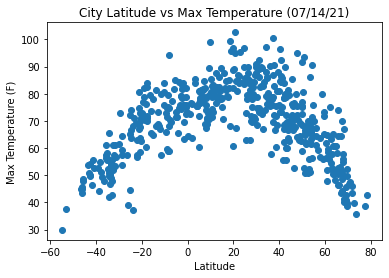

In [63]:
# All cities
plt.scatter(cities_df["Lat"], cities_df["Max Temp"])
plt.title("City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

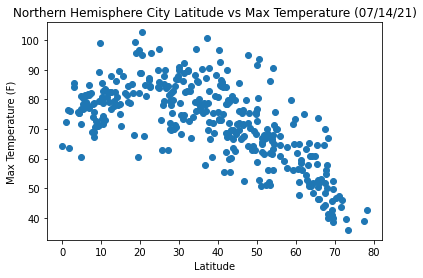

In [64]:
# Northern Hemisphere
plt.scatter(north_df["Lat"], north_df["Max Temp"])
plt.title("Northern Hemisphere City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

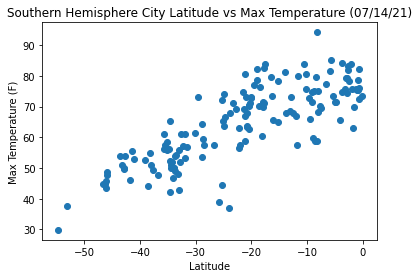

In [65]:
# Southern Hemisphere
plt.scatter(south_df["Lat"], south_df["Max Temp"])
plt.title("Southern Hemisphere City Latitude vs Max Temperature (07/14/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

The latitude vs temperature plots show that weather generally gets hotter moving toward the equator and cooler moving away. 

## Humidity (%) vs Latitude

## Cloudiness (%) vs Latitude

## Wind Speed (mph) vs Latitude